In [57]:
import mat73
import seaborn as sns
import pandas as pd

In [58]:
data_path = "data/U08_Wind turbine.mat"

In [59]:
data_dict = mat73.loadmat(data_path)

In [60]:
data_dict.keys()

dict_keys(['Sig_Mic_rotating'])

In [61]:
data_dict['Sig_Mic_rotating'].shape

(112, 1443840)

In [62]:
1443840 / 48128

30.0

In [63]:
df = pd.DataFrame(data_dict['Sig_Mic_rotating'])

In [64]:
df

,0,1,2,3,4,5,6,7,8,9,...,1443830,1443831,1443832,1443833,1443834,1443835,1443836,1443837,1443838,1443839
0,-0.103118,0.170339,-0.038984,-0.019245,0.134530,-0.010261,0.026693,-0.131819,-0.037115,0.119088,...,0.287957,0.032532,-0.064833,0.174807,0.108886,-0.091919,0.104318,0.111371,-0.114988,0.103959
1,0.170298,-0.081546,-0.048070,0.282553,-0.204108,-0.128456,0.177461,-0.081159,-0.034927,0.108205,...,0.124897,0.004718,0.085580,0.072655,0.053859,0.063286,0.043901,0.175090,0.015201,-0.091682
2,0.074469,0.182517,-0.200882,0.019958,0.135583,-0.177392,0.076159,0.090101,-0.303096,0.144391,...,0.120385,0.115032,-0.035356,-0.043067,0.219132,0.192315,-0.164055,0.038820,0.052428,-0.068953
3,0.059986,0.121333,-0.044660,0.095858,0.194884,-0.187054,0.022561,0.124038,-0.164811,0.083338,...,0.147793,-0.063977,-0.002904,0.197820,0.069463,-0.111830,0.036990,0.026958,-0.089366,0.158575
4,0.090063,-0.065729,0.003653,0.114549,-0.150117,-0.059386,0.192758,-0.121235,-0.007083,0.218607,...,0.081001,0.142409,0.005909,0.032821,0.112371,-0.083210,0.101856,0.187327,-0.064160,0.178197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.068975,0.201707,-0.055611,-0.061895,0.166372,-0.027529,0.029796,0.069733,-0.140758,-0.003028,...,0.098003,0.132302,0.020276,0.268520,0.083455,-0.159370,0.106972,-0.067258,-0.149894,0.216518
108,0.215595,-0.018450,-0.152884,0.225498,0.144901,-0.126530,0.142798,0.291698,-0.229762,-0.188028,...,0.322260,0.049790,-0.042286,0.094340,0.205332,-0.014794,0.060969,0.210477,-0.015232,-0.077943
109,0.043494,-0.128501,0.218070,0.054458,-0.229245,0.216065,0.133092,-0.329980,0.091904,0.196695,...,0.027700,0.192243,-0.002949,-0.004173,0.320651,-0.003132,-0.058814,0.361377,0.002679,-0.070764
110,-0.100191,0.026074,0.117946,-0.049203,0.048859,0.025561,0.090759,0.069143,-0.126879,0.111796,...,0.122824,0.178063,-0.102802,0.068981,0.254044,0.042059,-0.025558,0.267195,-0.007374,-0.157518


In [65]:
sample_rate = 48128

# Reduce number of points to plot in heatmap
df_compact = df.iloc[::1,::sample_rate]

# Get averaged values for each column
df_mean = pd.DataFrame()
for col in df_compact.columns:
    mean = df_compact[col].mean()
    df_mean[col] = [mean]

df_mean

,0,48128,96256,144384,192512,240640,288768,336896,385024,433152,...,962560,1010688,1058816,1106944,1155072,1203200,1251328,1299456,1347584,1395712
0,0.011038,-0.014448,-0.04216,-0.053382,0.015833,-0.050337,0.013383,-0.002126,0.001222,0.03816,...,-0.010645,-0.046367,0.054066,0.035081,-0.009191,0.007867,0.036614,-0.031862,-0.001523,0.007571


<AxesSubplot:>

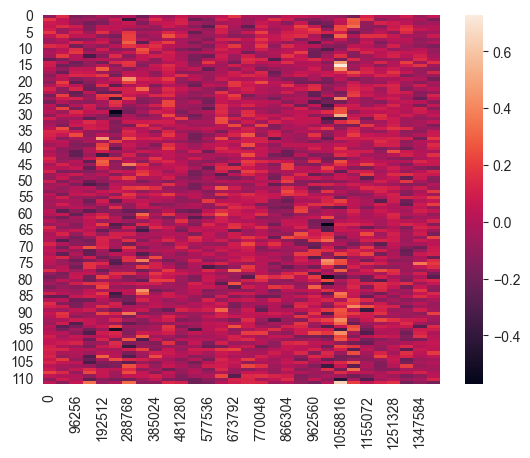

In [66]:
sns.heatmap(df_compact)

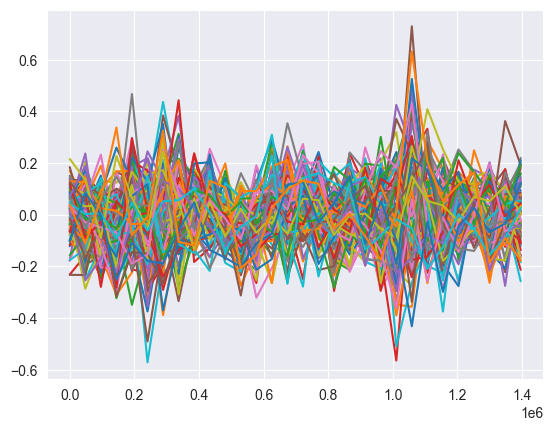

In [67]:
plot_rows = 112 # Each row corresponds to a microphone

for i in range(plot_rows):
    df_ = df_compact.iloc[i,:]
    sns.lineplot(data=df_,
                 x=df_.index,
                 y=df_.values)

<AxesSubplot:>

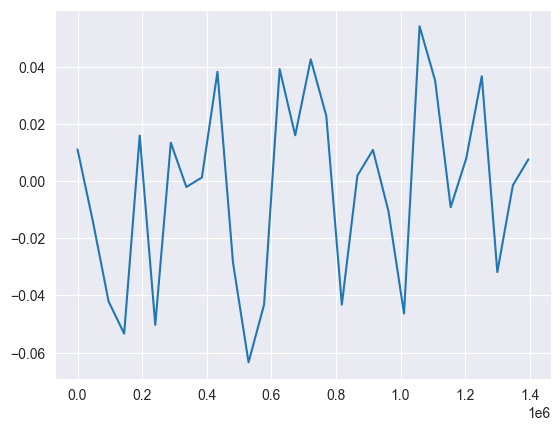

In [68]:
# Plot the mean microphone signal
# df only has 1 row, columns correspond to sample (time)

df_mean = df_mean.iloc[0,:]
sns.lineplot(data=df_mean,
             x=df_mean.index,
             y=df_mean.values)